In [27]:
%%capture
!pip install qiskit
from qiskit import *
from qiskit.visualization import *

#**2-Input Quantum Multiplexer**





###*A Simple Introduction to Classic Multiplexers*

Multiplexing is the generic term used to describe the operation of sending one or more analogue or digital signals over a common transmission line at different times or speeds and as such, the device we use to do just that is called a **Multiplexer**.

The multiplexer, shortened to “MUX” or “MPX”, is a combinational logic circuit designed to switch one of several input lines through to a single common output line by the application of a control signal. Multiplexers operate like very fast acting multiple position rotary switches connecting or controlling multiple input lines called “channels” one at a time to the output.

Multiplexers, or MUX’s, can be either digital circuits made from high speed logic gates used to switch digital or binary data or they can be analogue types using transistors, MOSFET’s or relays to switch one of the voltage or current inputs through to a single output.

**For this example, we shall make a 2-input Quantum Multiplexer.**
*The circuit diagram, along with its truth table is attached below*


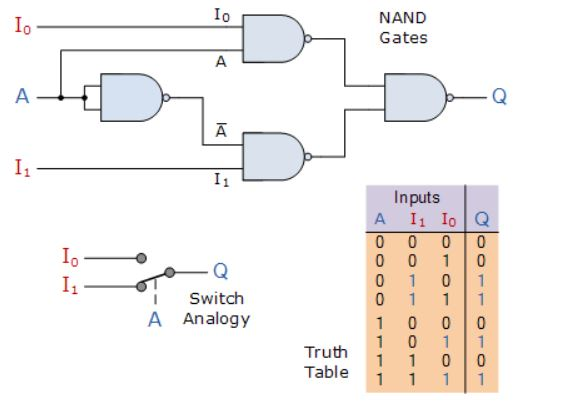

In [28]:
mux = QuantumCircuit(8,1)


**Here, we use 3 input qubits, and 5 *ancilla* bits.**

We shall be utilizing the Toffolli gates for performing classical AND operation and shall be using Quantum SWAP gate for transferring value from qubit 1 to ancilla qubit 7 (later, we shall also apply the X-gate on qubit 1 to restore its default user-input value*


**Encode your desired input here.**

*Input encoded here is A = 0, I_1 = 1; and I_1 = 1 as per truth table, and we expect a value of 1 as an output.*

In [29]:
mux.x(0)
mux.x(2)

In [30]:
mux.ccx(0,1,3)
mux.x(3)

mux.swap(1,7)
mux.x(1)
mux.ccx(1,7,4)
mux.x(4)


mux.ccx(4,2,5)
mux.x(5)

mux.ccx(3,5,6)
mux.x(6)

mux.measure(6,0)

mux.measure(2,0)



mux.draw()




┌───┐                                                      
q_0: ┤ X ├──■───────────────────────────────────────────────────
     └───┘  │          ┌───┐                                    
q_1: ───────■────────X─┤ X ├──■─────────────────────────────────
     ┌───┐  │        │ └───┘  │                              ┌─┐
q_2: ┤ X ├──┼────────┼────────┼─────────■────────────────────┤M├
     └───┘┌─┴─┐┌───┐ │        │         │                    └╥┘
q_3: ─────┤ X ├┤ X ├─┼────────┼─────────┼─────────■───────────╫─
          └───┘└───┘ │      ┌─┴─┐┌───┐  │         │           ║ 
q_4: ────────────────┼──────┤ X ├┤ X ├──■─────────┼───────────╫─
                     │      └─┬─┘└───┘┌─┴─┐┌───┐  │           ║ 
q_5: ────────────────┼────────┼───────┤ X ├┤ X ├──■───────────╫─
                     │        │       └───┘└───┘┌─┴─┐┌───┐┌─┐ ║ 
q_6: ────────────────┼────────┼─────────────────┤ X ├┤ X ├┤M├─╫─
                     │        │                 └───┘└───┘└╥┘ ║ 
q_7: ────────────────X────────■────────────────────────────╫──╫─
                                                           ║  ║ 
c: 1/══════════════════════════════════════════════════════╩══╩═
                                                           0  0

In [31]:
backend = Aer.get_backend('qasm_simulator')
final_state = execute(mux,backend).result().get_counts()

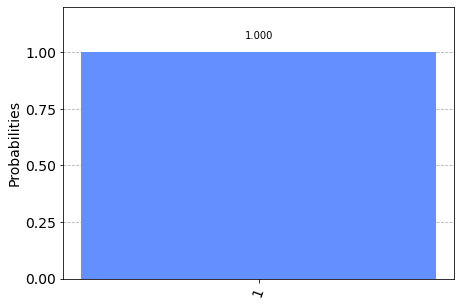

In [32]:
plot_histogram(final_state)

In [34]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright